# YGOB Data Exploration




### Import required packages

In [20]:
import functions as f
import pandas as pd
import matplotlib.pyplot
from importlib import reload
from copy import deepcopy
reload(f);

### Read in associated files

In [2]:
Anc=f.import_ancestor('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Ancestor_genome.tab')
Cglabrata=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Cglabrata_genome.tab')
Ecymbalariae=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Ecymbalariae_genome.tab')
Egossypii=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Egossypii_genome.tab')
Kafricana=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Kafricana_genome.tab')
Klactis=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Klactis_genome.tab')
Knaganishii=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Knaganishii_genome.tab')
Lkluyveri=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Lkluyveri_genome.tab')
Lthermotolerans=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Lthermotolerans_genome.tab')
Lwaltii=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Lwaltii_genome.tab')
Ncastallii=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Ncastellii_genome.tab')
Ndairenensis=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Ndairenensis_genome.tab')
Scerevisiae=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Scerevisiae_genome.tab')
Skudriavzevii=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Skudriavzevii_genome.tab')
Smikitae=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Smikatae_genome.tab')
Suvarum=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Suvarum_genome.tab')
Tblattae=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Tblattae_genome.tab')
Tdelbrueckii=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Tdelbrueckii_genome.tab')
Tphaffii=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Tphaffii_genome.tab')
Vpolyspora=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Vpolyspora_genome.tab')
Zrouxii=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Zrouxii_genome.tab')
pillars=f.pillar_filter('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Pillars.tab','http://ygob.ucd.ie/ygob/data/v7-Aug2012/AA.fsa')



In [3]:
species=[Cglabrata,Ecymbalariae,Egossypii,Kafricana,Klactis,Knaganishii,Lkluyveri,Lthermotolerans,Lwaltii,Ncastallii,Ndairenensis,Scerevisiae,Skudriavzevii,Smikitae,Suvarum,Tblattae,Tdelbrueckii,Tphaffii,Vpolyspora,Zrouxii]
specie_names=["Cglabrata","Ecymbalariae","Egossypii","Kafricana","Klactis","Knaganishii","Lkluyveri","Lthermotolerans","Lwaltii","Ncastallii","Ndairenensis","Scerevisiae","Skudriavzevii","Smikitae","Suvarum","Tblattae","Tdelbrueckii","Tphaffii","Vpolyspora","Zrouxii"]

## General species info

We can see in the following two plots the distribution of family sizes. The second plot has the singular families, those with only one gene, removed for a better view of the distribution of the other sizes.

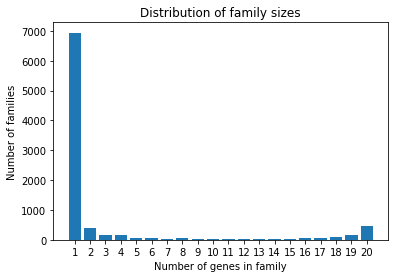

In [4]:
fig, ax=matplotlib.pyplot.subplots()
bar=ax.bar(list(range(1,21)),f.family_lengths(pillars))
ax.set_xticks(list(range(1,21)));
ax.set_xlabel("Number of genes in family");
ax.set_ylabel("Number of families");
ax.set_title("Distribution of family sizes");

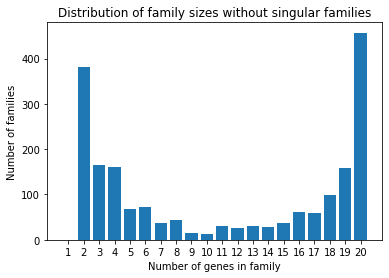

In [5]:
new = {key: pillars[key]  for key in pillars.keys() if len(pillars[key]['genes'])>1}
lengths=f.family_lengths(new)


fig, ax=matplotlib.pyplot.subplots()
bar=ax.bar(list(range(1,21)),lengths)
ax.set_xticks(list(range(1,21)));
ax.set_xlabel("Number of genes in family");
ax.set_ylabel("Number of families");
ax.set_title("Distribution of family sizes without singular families");

The following plot shows the fragmentation, number of different segments (chromosome/contig/scaffolds).

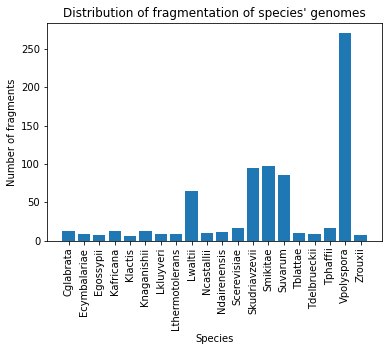

In [6]:
fragmentation=f.species_fragmentation(species)

fig, ax=matplotlib.pyplot.subplots()
matplotlib.pyplot.xticks(rotation=90)
bar=ax.bar(list(range(len(species))),fragmentation,tick_label=specie_names)
#ax.set_xticklabels(specie_names,rotation='vertical');
ax.set_xlabel("Species");
ax.set_ylabel("Number of fragments");
ax.set_title("Distribution of fragmentation of species' genomes");

The following plot shows for each specie the number of non singular families that contain a gene from the given specie.

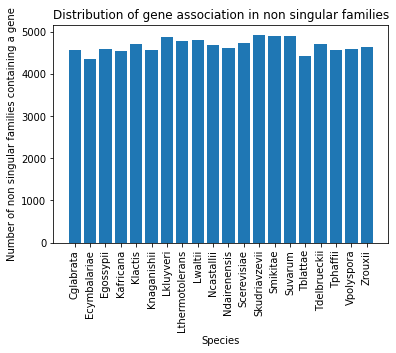

In [7]:
associations=f.species_associations(species,pillars)

fig, ax=matplotlib.pyplot.subplots()
matplotlib.pyplot.xticks(rotation=90)
bar=ax.bar(list(range(len(species))),associations,tick_label=specie_names)
ax.set_xlabel("Species");
ax.set_ylabel("Number of non singular families containing a gene");
ax.set_title("Distribution of gene association in non singular families");




## Info on species pairs

The following plot shows how many gene pairs each specie has with Saccharomyces Cerevisia.

Pairs are counted as the number of families with a gene from each species, if there are two copies from each then that is counted as 2 families and same for 3 and so on. If there is only 1 gene from one specie and 2 from the other in the family this only counts as one pair. 

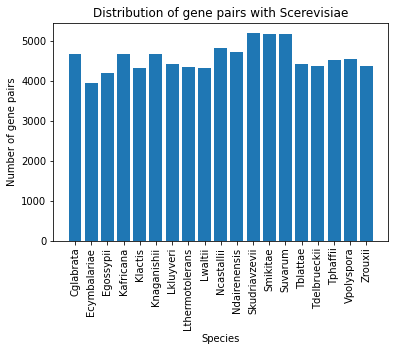

In [8]:
new=deepcopy(species)
new.pop(specie_names.index("Scerevisiae"))
Scer_matches=[f.species_pairs(x,Scerevisiae,pillars) for x in new]
names=deepcopy(specie_names)
ind=specie_names.index("Scerevisiae")
names.pop(ind)


fig, ax=matplotlib.pyplot.subplots()
matplotlib.pyplot.xticks(rotation=90)
bar=ax.bar(list(range(len(names))),Scer_matches,tick_label=names)
ax.set_xlabel("Species");
ax.set_ylabel("Number of gene pairs");
ax.set_title("Distribution of gene pairs with Scerevisiae");




### Matches Table
The following table shows the number of families in which both species have a gene, in the case that a family has two genes from each species this is counted as two families seeing as when families are reconcilled they will end up as two distinct families. When we have the same species the value represents the number of families in which we have more than one gene from the associated species.

In [9]:
data = f.match_matrix(species,specie_names,pillars)
 
df = pd.DataFrame(data, index=specie_names)
 
df

,Cglabrata,Ecymbalariae,Egossypii,Kafricana,Klactis,Knaganishii,Lkluyveri,Lthermotolerans,Lwaltii,Ncastallii,Ndairenensis,Scerevisiae,Skudriavzevii,Smikitae,Suvarum,Tblattae,Tdelbrueckii,Tphaffii,Vpolyspora,Zrouxii
Cglabrata,393,4041,4283,4704,4339,4701,4406,4344,4368,4789,4731,4677,4830,4831,4846,4525,4462,4618,4609,4371
Ecymbalariae,4041,0,4231,4010,4097,4012,4176,4096,4107,4069,4042,3947,4085,4086,4093,3951,4111,4034,4036,4045
Egossypii,4283,4231,0,4244,4323,4253,4414,4336,4335,4311,4279,4190,4331,4333,4340,4182,4351,4272,4271,4286
Kafricana,4704,4010,4244,504,4300,4824,4377,4305,4321,4861,4806,4683,4833,4843,4850,4519,4427,4599,4600,4335
Klactis,4339,4097,4323,4300,0,4321,4635,4539,4495,4382,4332,4333,4385,4392,4402,4214,4432,4315,4329,4463
Knaganishii,4701,4012,4253,4824,4321,457,4393,4324,4339,4871,4802,4670,4817,4830,4838,4497,4441,4593,4584,4351
Lkluyveri,4406,4176,4414,4377,4635,4393,0,4688,4609,4460,4412,4422,4483,4488,4495,4281,4543,4396,4406,4576
Lthermotolerans,4344,4096,4336,4305,4539,4324,4688,0,4681,4392,4343,4355,4414,4419,4428,4219,4479,4332,4340,4501
Lwaltii,4368,4107,4335,4321,4495,4339,4609,4681,0,4405,4357,4321,4437,4436,4447,4236,4488,4348,4352,4439
Ncastallii,4789,4069,4311,4861,4382,4871,4460,4392,4405,596,5108,4820,4962,4970,4990,4593,4503,4683,4693,4414


In [23]:
f.group_pairs([Scerevisiae, Smikitae, Zrouxii],pillars)

14004

In [24]:
5184+4376+4444

14004